### AlimConfiance Groupe 4 : Audrey, Jaufret, Babacar

## Mise en forme des données

1. Importation des librairies et du dataset

In [132]:
#Importation des librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from IPython.display import display
from sklearn import preprocessing

# Importation du dataset
export_alim_path=r'C:\Users\diaba\Desktop\export_alimconfiance.csv'
df=pd.read_csv(export_alim_path, sep=";")

# Affichage des données
df.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


2. Affichage des informations descriptives relatives aux variables

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35662 entries, 0 to 35661
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           35662 non-null  object
 1   SIRET                               35662 non-null  object
 2   Adresse_2_UA                        35211 non-null  object
 3   Code_postal                         35662 non-null  object
 4   Libelle_commune                     35662 non-null  object
 5   Numero_inspection                   35662 non-null  object
 6   Date_inspection                     35662 non-null  object
 7   APP_Libelle_activite_etablissement  35662 non-null  object
 8   Synthese_eval_sanit                 35662 non-null  object
 9   Agrement                            9840 non-null   object
 10  geores                              34563 non-null  object
 11  filtre                              25999 non-null  ob

3. Supression des colonnes jugées non pertinantes

In [134]:
# Suppression des colonnes
df. drop(['APP_Libelle_etablissement', 'Adresse_2_UA', 'Libelle_commune', 'Numero_inspection','Date_inspection','geores', 'filtre'], axis = 1, inplace = True)
#Affichage des colonnes restantes
#On peut remarquer que toutes les valeurs sont non-null mise à part dans la colonne Agrement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35662 entries, 0 to 35661
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SIRET                               35662 non-null  object
 1   Code_postal                         35662 non-null  object
 2   APP_Libelle_activite_etablissement  35662 non-null  object
 3   Synthese_eval_sanit                 35662 non-null  object
 4   Agrement                            9840 non-null   object
 5   ods_type_activite                   35662 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


4. Conversion des valeurs

In [135]:
# SIRET
df.drop(df[df['SIRET'].str.contains("^[a-z].*$", regex=True, case=False)].index, inplace=True)
df['SIRET']=df['SIRET'].astype('int64')

# Code_postal
# Récupération du département dans le code postal (suppression des 3 dernier chiffres)
df['Code_postal'] = df['Code_postal'].apply(lambda x: str(x)[:2])
df['Code_postal'] = df['Code_postal'].astype(int)

# Agrement
# Remplace les valeurs abs par des 0 dans la colonne
df['Agrement'] = df['Agrement'].fillna(0)
# Change le type de données en string (passage obligatoire car présence de lettre dans les agréments)
df['Agrement']=df['Agrement'].astype(str)
# Remplace les valeurs autre que 0 par 1 et converti la colonne en int
df['Agrement'] = (df['Agrement'] != 0).astype(int)

# Synthese_eval_sanit
#Transformation de la colonne Synthese_eval_sanit grâce à get_dummies
# Affichage des différents niveaux d'hygiène existants

# Répartition des différents niveaux d'hygiene dans 4 colonnes
df = pd.get_dummies(df, columns=['Synthese_eval_sanit'])

#Mise en forme de la colonne ods_type_activite
# Vérification des données
le = preprocessing.LabelEncoder()

df_type_activite=df['ods_type_activite'].astype(str)
df_type_activite_fit=le.fit_transform(df_type_activite)
df_type_activite_fit=pd.DataFrame(df_type_activite_fit, columns=['LabelEncoder'])
df_type_activite=pd.concat([df_type_activite,df_type_activite_fit], axis=1)
df['ods_type_activite'] = df_type_activite_fit
df['ods_type_activite'].astype(int)
# Mise en forme de la colonne libelle_activite
# Suppression des lignes avec libelles manquants
df.drop(df[df['APP_Libelle_activite_etablissement'].str.contains("_")==True].index, inplace=True)

# sépérations des libelles d'activités
df_libelle = df['APP_Libelle_activite_etablissement']
delimiter = '|'
df_length = len(df_libelle)
s = []
for i in range(0, df_length):
    row = df_libelle.iloc[i]
    lib_activite = row.split(delimiter)
    s = s + lib_activite
d = {'APP_Libelle_activite_etablissement': s}
df_libelle = pd.DataFrame(data=d)
df_libelle.drop_duplicates(subset=['APP_Libelle_activite_etablissement'], keep='first', ignore_index=True ,inplace=True)

#Application d'un labelEncoder sur le df_libelle 
df_libelle.astype(str)
df_libelle_fit=le.fit_transform(df_libelle)
df_libelle_fit=pd.DataFrame(df_libelle_fit, columns=['LabelEncoder'])
df_libelle=pd.concat([df_libelle,df_libelle_fit], axis=1)


#print(df_libelle.value_counts())
# df.to_csv(path_or_buf=SAVE_CSV_FILEPATH + filename + '_temp.csv', sep=';', index=True)
# print("\nFile '%s.csv' created\n" % filename)

# Verifications
# display(df.columns)
df.head(5)
print(df.info())
# print(df['Agrement'].value_counts())
# print(df['Synthese_eval_sanit'].value_counts())
# df_type_activite.value_counts()
#df_libelle.value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35435 entries, 0 to 35661
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   SIRET                                              35435 non-null  int64  
 1   Code_postal                                        35435 non-null  int32  
 2   APP_Libelle_activite_etablissement                 35435 non-null  object 
 3   Agrement                                           35435 non-null  int32  
 4   ods_type_activite                                  35331 non-null  float64
 5   Synthese_eval_sanit_A améliorer                    35435 non-null  uint8  
 6   Synthese_eval_sanit_A corriger de manière urgente  35435 non-null  uint8  
 7   Synthese_eval_sanit_Satisfaisant                   35435 non-null  uint8  
 8   Synthese_eval_sanit_Très satisfaisant              35435 non-null  uint8  
dtypes: floa

c:\Users\diaba\Documents\SimplonIAMicrosoft_21-23\AlimConfiance\IASecuAlim\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
#visualisation des données
plt.hist(df.Class, bins=2, color = "gray", edgecolor = 'red')
plt.title('histogramme',fontsize = 20)
plt.xlabel('tumeur',fontsize = 16)
plt.ylabel('fréquence', fontsize = 16)
#ax = plt.axes()
#ax.xaxis.set_major_locator(MultipleLocator(2))


AttributeError: 'DataFrame' object has no attribute 'Class'

In [ ]:
#vérifier la distribution absolue des catégories de tumeurs
df.Class.value_counts()


2    457
4    241
Name: Class, dtype: int64

In [ ]:
#la distribution relative des catégories de tumeurs
df.Class.value_counts(normalize=True)


2    0.654728
4    0.345272
Name: Class, dtype: float64

3. Nous souhaitons réserver 390 observations pour l’entraînement et 297 pour le test, avec un échantillonnage qui respectent les proportions des classes dans les deux sous-ensembles (stratify)

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=300,random_state=1,stratify=df.Class)

In [ ]:
#vérification des dimensions
y_train.shape , y_test.shape

((398,), (300,))

In [ ]:
#vérification des distributions en apprentissage
y_train.value_counts(normalize=True)

2    0.655779
4    0.344221
Name: Class, dtype: float64

In [ ]:
#vérification des distributions en test
y_test.value_counts(normalize=True)

2    0.653333
4    0.346667
Name: Class, dtype: float64

## Modélisation : arbre de décision

1. Instancier l’ arbre de décision avec deux paramètres suivants : 
     - un sommet n’est pas segmenté s’il est composé de moins de 30 individus -> min_samples_split
     - une segmentation est validée si et seulement si les feuilles générées comportent tous au moins 10 observations -> min_samples_leaf


In [ ]:
# importer la classe DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# créer le modèle d'arbre de décision
# min_samples_split permet de bloquer la segmentation en dessous d'un certain nombre d'individus
# min_samples_leaf permet de valider une segmentation si les feuilles générées comportent tous au moins un certain nombre d'obeservations
classifier = RandomForestClassifier(n_estimators=60,random_state=0)
# notre modèle est stocké dans la variable classifier 

2. Entraîner votre modèle

In [ ]:
# entraîner le modèle 
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

2. Afficher l'arbre de décision 

In [ ]:
# importance des variables à l'aide de la méthode ’.feature_importances_’
impVarFirst={"Variable":df.columns[:-1],"Importance":classifier.feature_importances_}
pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False)

,Variable,Importance
2,Uniformity of Cell Size,0.297371
6,Bare Nuclei,0.155579
8,Normal Nucleoli,0.133110
3,Uniformity of Cell Shape,0.123372
7,Bland Chromatin,0.115693
5,Single Epithelial Cell Size,0.068121
1,Clump Thickness,0.053806
4,Marginal Adhesion,0.032563
0,id,0.012903
9,Mitoses,0.007481


3. Réaliser les prédictions sur l'échantillon test

In [ ]:
y_pred = classifier.predict(X_test)
y_pred.shape


(300,)

4. Afficher la matrice de confusion

Confusion matrix:
[[189   7]
 [  5  99]]


C:\Users\diaba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


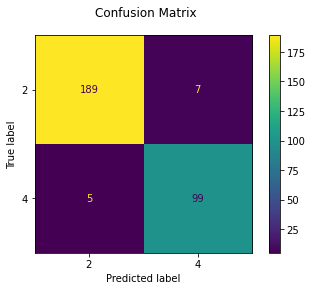

In [ ]:
#matrice de confusion
from sklearn import metrics
disp = metrics.plot_confusion_matrix(classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

5. afficher la précision et le rappel

In [ ]:
#rapport de prédiction
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       196
           4       0.93      0.95      0.94       104

    accuracy                           0.96       300
   macro avg       0.95      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Interprétation

 - le support. C'est le nombre d'éléments dans chacune des classes de l'échantillon de test.
 
 
 - precision : il est définit par $p = \frac{TP}{TP+FP}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédits dans la classe $k$, et FP = "false positives" = nombre d'éléments qui n'étaient pas de la classe $k$ mais qui ont à tort été prédits en classe $k$. La précision est donc le rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre d'éléments total prédit comme $k$. Elle correspond à la pertinence de l'information remontée, mais ne s'intéresse pas à la quantité d'informations remontée : on aura peut être raté certains exemples de la classe $k$, qui auront été prédit dans une autre classe, mais tout ce qui a été prédit en classe $k$ est effectivement de la classe $k$, et donc pertinent.
 
 
 - recall : il est définit par $r = \frac{TP}{TP+FN}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédit dans la classe $k$, et FN = "false negatives" = nombre d'éléments qui étaient vraiment de la classe $k$ mais qui ont été prédit comme une autre classe. Le rappel est donc le rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre total d'éléments qui sont vraiment de la classe $k$ et qui auraient dû être prédits en $k$. Cela correspond à la quantité d'information effectivement remontée : même si l'on fait beaucoup d'erreur en prédisant en classe $k$ des exemples qui n'appartiennent pas à cette classe, on n'aura raté aucun exemple de la classe $k$.
 
 
 - f1-score : le f1-score est la moyenne harmonique de la précision et du rappel, et il baisse si l'une des deux mesures baisse. On pourra retenir $f1 = 2 \frac{p \times r }{p+r}$. Toutes ces mesures valent pour une classe donnée $k$. Pour en faire une mesure globale, on peut moyenner les précisions / rappels pour chacune des classes (c'est le macro average), ou pondérer cette moyenne par la taille du support (weighted avg).

- accuracy, qui est une mesure globale qui correspond au nombre moyen d'exemples correctement prédits. C'est la mesure la plus simple, mais attention, la plus trompeuse lorsqu'il y a beaucoup de classes dans un modèle 


### Pour Aller plus loin 

Modification des paramètres d’apprentissage

Notre arbre paraît tout de même surdimensionné. En effet on remarque   que plusieurs feuilles issues du même sommet père portent  des conclusions identiques. L'idée est donc d'introduire  un nouveau paramètre pour réduire la taille de l’arbre.
On peut spécifier le nombre de noeud (max_leaf_nodes = 3) c.-à-d. dans notre cas un arbre qui produit 3 règles au maximum. Dixit  la méthode qui suit effectue en priorité les segmentations qui maximisent les contributions.


In [ ]:
#modifions les paramètres d'apprentissage
cls2 = 
#construction de l'arbre

#affichage graphique de l'arbre


SyntaxError: invalid syntax (3600798431.py, line 2)

L’arbre est fortement simplifié et maintient ses qualités prédictives ! Vérifions le :


In [ ]:
#prédiction sur l'échantillon test

#matrice de confusion


[[180  16]
 [ 10  94]]


Conclure en comparant les deux matrices de confusion.